In [1]:
from pycesam import *
from pycesam.gui import *
import astropy.units as u
from astropy.constants import R_jup, R_sun, mu0, M_sun, G
import matplotlib.pyplot as plt
import numpy as np
%matplotlib widget
from ipywidgets import interact

In [2]:
mdl = CModel('1MJ_R')
mdl_plot = CModelGUI('1MJ_R')

Reading 1MJ_R.don...[Done]
Reading 1MJ_R.run...[Done]
Reading 1MJ_R.frun...[Done]


Reading *1MJ_R*.osc files:   0%|          | 0/108 [00:00<?, ?it/s]

Reading 1MJ_R.HRnew...[Done]
Reading 1MJ_R.don...[Done]
Reading 1MJ_R.run...[Done]
Reading 1MJ_R.frun...[Done]


/home/localuser/Desktop/M2/Gas_Dynamics/Project/cesam2k20/python3/pycesam/__init__.py:1226: RuntimeWarning: divide by zero encountered in log10
  self.FeH  = np.log10(self.z/x) - np.log10(zsx_sol)
/home/localuser/Desktop/M2/Gas_Dynamics/Project/cesam2k20/python3/pycesam/__init__.py:1226: RuntimeWarning: invalid value encountered in log10
  self.FeH  = np.log10(self.z/x) - np.log10(zsx_sol)


Reading *1MJ_R*.osc files:   0%|          | 0/108 [00:00<?, ?it/s]

Reading 1MJ_R.HRnew...[Done]


In [3]:
mdl.params.alpha

1.642090699560724

In [4]:
print(mdl.params.w_rot)

5.0


In [5]:
len(mdl.glob)

108

In [6]:
print(mdl.glob[107][11])

0.00010107514919


In [7]:
print(mdl.var[0][15])
print(len(mdl.var[0][15]))

[2.16540312e-05 2.16540312e-05 2.16540312e-05 2.16540312e-05
 2.16540312e-05 2.16540312e-05 2.16540312e-05 2.16540312e-05
 2.16540312e-05 2.16540312e-05 2.16540312e-05 2.16540312e-05
 2.16540312e-05 2.16540312e-05 2.16540312e-05 2.16540312e-05
 2.16540312e-05 2.16540312e-05 2.16540312e-05 2.16540312e-05
 2.16540312e-05 2.16540312e-05 2.16540312e-05 2.16540312e-05
 2.16540312e-05 2.16540312e-05 2.16540312e-05 2.16540312e-05
 2.16540312e-05 2.16540312e-05 2.16540312e-05 2.16540312e-05
 2.16540312e-05 2.16540312e-05 2.16540312e-05 2.16540312e-05
 2.16540312e-05 2.16540312e-05 2.16540312e-05 2.16540312e-05
 2.16540312e-05 2.16540312e-05 2.16540312e-05 2.16540312e-05
 2.16540312e-05 2.16540312e-05 2.16540312e-05 2.16540312e-05
 2.16540312e-05 2.16540312e-05 2.16540312e-05 2.16540312e-05
 2.16540312e-05 2.16540312e-05 2.16540312e-05 2.16540312e-05
 2.16540312e-05 2.16540312e-05 2.16540312e-05 2.16540312e-05
 2.16540312e-05 2.16540312e-05 2.16540312e-05 2.16540312e-05
 2.16540312e-05 2.165403

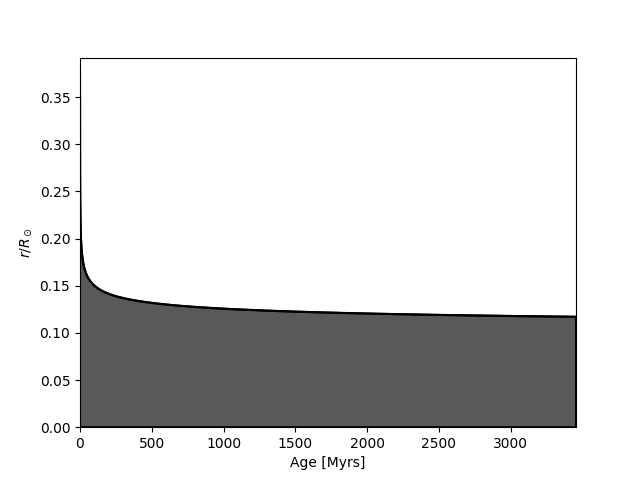

In [8]:
mdl_plot.plot_cz(r_or_m='r')
plt.show()

In [9]:
end = len(mdl.glob) - 1
Omega = mdl.params.w_rot*1e3
R_tot = mdl.var[end][0][0]/1e2
print(f"total radius of planet = {R_tot/(R_jup.value)} Rjup")
print(f"total mass of planet = {mdl.params.mtot} Msun")
print(f"total angular velocity of planet = {Omega/1e3} km/s")

total radius of planet = 1.1382211674285234 Rjup
total mass of planet = 0.001 Msun
total angular velocity of planet = 5.0 km/s


In [10]:
print(R_sun.value/R_jup.value)
print(1.13/9.73)

9.73115873104683
0.1161356628982528


In [11]:
print(mdl.var[end][0][0]/(1e2*R_jup.value))
print(mdl.var[0][0][0]/(1e2*R_jup.value))

1.1382211674285234
3.7242688952833882


In [12]:
#print(mdl.var[0][15]*mdl.var[0][0]/1e5)
print(mdl.var[end][15]*mdl.var[end][0]/1e5)
Omega_array = mdl.var[end][15]#*mdl.var[end][0]
print(Omega_array)

[8.22485965 8.22178429 8.22090831 8.22026403 8.21971011 8.21919997
 8.21871322 8.21823997 8.21777535 8.21731732 8.21686543 8.21642018
 8.21598266 8.21555424 8.21513642 8.21473072 8.2143387  8.21396191
 8.21360209 8.21326131 8.21294216 8.21264802 8.21238307 8.21215234
 8.21196148 8.21181641 8.21169692 8.21157884 8.21146217 8.2113469
 8.21123303 8.21112057 8.21100952 8.2108999  8.21079171 8.21068496
 8.21057966 8.21047583 8.21037346 8.21027259 8.2101732  8.2100753
 8.2099789  8.209884   8.2097906  8.20969868 8.20960824 8.20951927
 8.20943179 8.20934579 8.20926125 8.20917815 8.20909647 8.20901616
 8.20893719 8.20885951 8.20878307 8.20870782 8.20863371 8.20856065
 8.2084886  8.20841748 8.20834722 8.20827774 8.20820896 8.20814079
 8.20807316 8.20800596 8.20793912 8.20787252 8.20780608 8.20773968
 8.20767323 8.20760661 8.20753972 8.20747243 8.20740464 8.20733621
 8.20726704 8.20719699 8.20712594 8.20705375 8.20698029 8.20690542
 8.20682899 8.20675086 8.20667087 8.20658888 8.20650473 8.206418

/home/localuser/Desktop/M2/Gas_Dynamics/Project/cesam2k20/python3/pycesam/__init__.py:3979: RuntimeWarning: invalid value encountered in divide
  self.Frad = krad*te*grad/hp


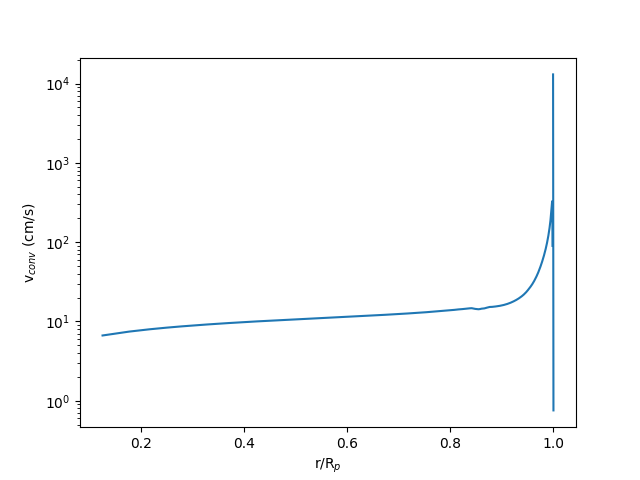

In [13]:
mdl.calc_vconv('osc', i=end)
r = ((mdl.var[end][0])/(R_tot*1e2))

plt.figure()
plt.plot(r, mdl.vconv)
plt.xlabel(r'r/R$_p$')
plt.ylabel(r'v$_{conv}$ (cm/s)')
plt.yscale('log')
plt.show()

In [14]:
mask = np.where(~np.isnan(mdl.vconv))
print(mask)

(array([  0,   1,   2,   3,   4,   5,   6,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182,
       183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195,
       196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208,
       209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 2

In [15]:
mdl.vconv[mask]

array([7.54511137e-01, 8.33160766e+01, 3.17708249e+02, 8.51070129e+02,
       2.00047102e+03, 4.54683894e+03, 1.30645955e+04, 8.97157482e+01,
       1.42391540e+02, 1.71287443e+02, 1.92221600e+02, 2.08390987e+02,
       2.21127422e+02, 2.31253019e+02, 2.39388923e+02, 2.46156799e+02,
       2.52025184e+02, 2.57265593e+02, 2.62028733e+02, 2.66390650e+02,
       2.70395888e+02, 2.74118460e+02, 2.77645963e+02, 2.81056414e+02,
       2.84392753e+02, 2.87616158e+02, 2.90653192e+02, 2.93439487e+02,
       2.95930032e+02, 2.98102975e+02, 2.99982142e+02, 3.01650422e+02,
       3.03191853e+02, 3.04681105e+02, 3.06180769e+02, 3.07738587e+02,
       3.09359557e+02, 3.10989256e+02, 3.12567349e+02, 3.14037925e+02,
       3.15354209e+02, 3.16484524e+02, 3.17450589e+02, 3.18330270e+02,
       3.19200129e+02, 3.20118550e+02, 3.21112495e+02, 3.22164149e+02,
       3.23189659e+02, 3.24100522e+02, 3.24839189e+02, 3.25386621e+02,
       3.25769537e+02, 3.26067484e+02, 3.26359550e+02, 3.26693025e+02,
      

In [16]:
print(np.mean(mdl.vconv[300:]))

nan


In [17]:
print(mdl.lmix)

[2.91950191e+06 2.91642877e+06 2.91573130e+06 2.91539120e+06
 2.91525740e+06 2.91530337e+06 2.91555838e+06 2.91609555e+06
 2.91704046e+06 2.91859046e+06 2.92104166e+06 2.92482837e+06
 2.93056778e+06 2.93910082e+06 2.95151478e+06 2.96912209e+06
 2.99336355e+06 3.02560825e+06 3.06684751e+06 3.11732637e+06
 3.17620560e+06 3.24136621e+06 3.30943514e+06 3.37603866e+06
 3.43622534e+06 3.48497558e+06 3.52702356e+06 3.57020175e+06
 3.61440356e+06 3.65952139e+06 3.70540240e+06 3.75198537e+06
 3.79916866e+06 3.84685606e+06 3.89496813e+06 3.94342099e+06
 3.99211186e+06 4.04093376e+06 4.08980521e+06 4.13866613e+06
 4.18745812e+06 4.23611335e+06 4.28456593e+06 4.33275681e+06
 4.38063594e+06 4.42815964e+06 4.47528957e+06 4.52139242e+06
 4.56620118e+06 4.61019631e+06 4.65336839e+06 4.69572846e+06
 4.73730468e+06 4.77813472e+06 4.81825950e+06 4.85771511e+06
 4.89653195e+06 4.93473922e+06 4.97236744e+06 5.00944891e+06
 5.04601506e+06 5.08209663e+06 5.11772337e+06 5.15292411e+06
 5.18772872e+06 5.222175

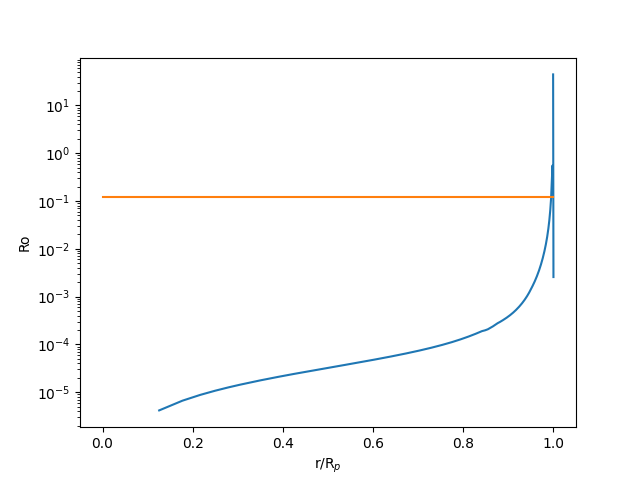

In [18]:
Ro = mdl.vconv/(mdl.lmix*Omega_array)
plt.figure()
plt.plot(r, Ro)
plt.plot(r, 0.12*np.ones(len(Ro)), label=r'critical R$_o$')
plt.xlabel(r'r/R$_p$')
plt.ylabel(r'Ro')
plt.yscale('log')
plt.show()

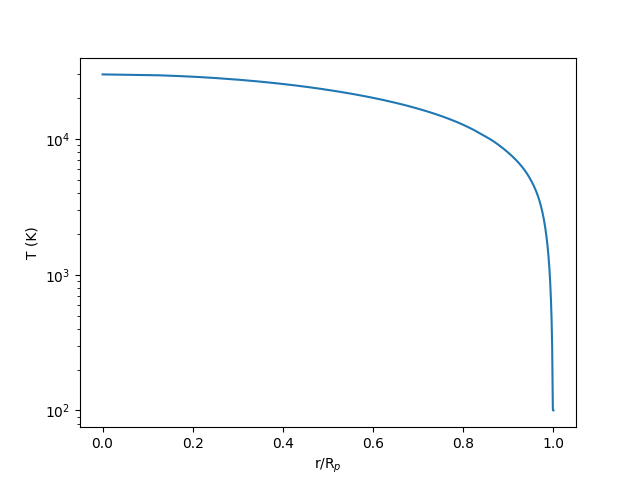

In [19]:
T = mdl.var[end][2]

plt.figure()
plt.plot(r, T)
plt.xlabel(r'r/R$_p$')
plt.ylabel(r'T (K)')
plt.yscale('log')
plt.show()

In [20]:
@interact(x=(0, len(mdl.var), 1)) 
def plot_pressure_over_time(i=end):
    plt.figure()
    plt.plot(r, mdl.var[i][3]*1e-12)
    plt.xlabel(r'r/R$_p$')
    plt.ylabel(r'P (Mbar)')
    plt.yscale('log')
    plt.show()

#interact(plot_pressure_over_time, i=np.arange(0, len(mdl.var)))

"""P = mdl.var[end][3]
P_bar = P*1e-12

plt.figure()
plt.plot(r, P_bar)
plt.xlabel(r'r/R$_p$')
plt.ylabel(r'P (Mbar)')
plt.yscale('log')
plt.show()"""

interactive(children=(IntSlider(value=107, description='i', max=321, min=-107), Output()), _dom_classes=('widg…

"P = mdl.var[end][3]\nP_bar = P*1e-12\n\nplt.figure()\nplt.plot(r, P_bar)\nplt.xlabel(r'r/R$_p$')\nplt.ylabel(r'P (Mbar)')\nplt.yscale('log')\nplt.show()"

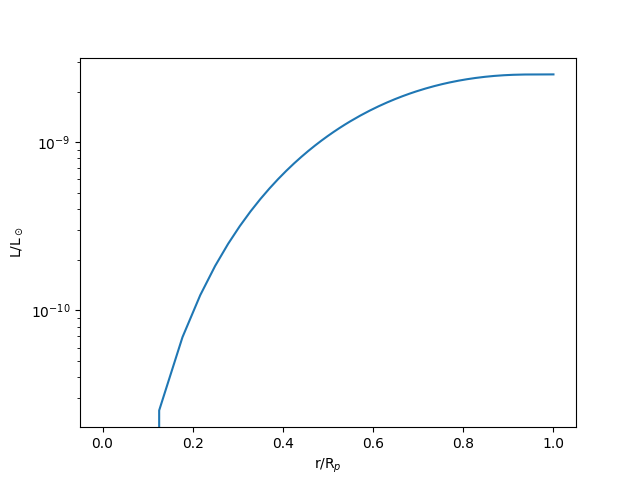

In [21]:
L = mdl.var[end][6]
L_sun = mdl.glob[end][16]

plt.figure()
plt.plot(r, L/L_sun)
plt.xlabel(r'r/R$_p$')
plt.ylabel(r'L/L$_\odot$')
plt.yscale('log')
plt.show()

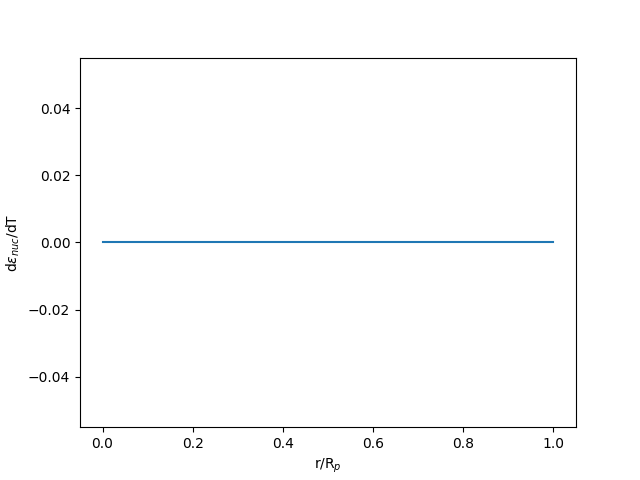

In [22]:
denuc_dT = mdl.var[end][18]

plt.figure()
plt.plot(r, denuc_dT)
plt.xlabel(r'r/R$_p$')
plt.ylabel(r'd$\epsilon_{nuc}$/dT')
#plt.yscale('log')
plt.show()

In [23]:
print(mdl.glob[end][16])

3.828e+33


In [24]:
plt.close('all')

In [25]:
print(mdl.lmix)

[2.91950191e+06 2.91642877e+06 2.91573130e+06 2.91539120e+06
 2.91525740e+06 2.91530337e+06 2.91555838e+06 2.91609555e+06
 2.91704046e+06 2.91859046e+06 2.92104166e+06 2.92482837e+06
 2.93056778e+06 2.93910082e+06 2.95151478e+06 2.96912209e+06
 2.99336355e+06 3.02560825e+06 3.06684751e+06 3.11732637e+06
 3.17620560e+06 3.24136621e+06 3.30943514e+06 3.37603866e+06
 3.43622534e+06 3.48497558e+06 3.52702356e+06 3.57020175e+06
 3.61440356e+06 3.65952139e+06 3.70540240e+06 3.75198537e+06
 3.79916866e+06 3.84685606e+06 3.89496813e+06 3.94342099e+06
 3.99211186e+06 4.04093376e+06 4.08980521e+06 4.13866613e+06
 4.18745812e+06 4.23611335e+06 4.28456593e+06 4.33275681e+06
 4.38063594e+06 4.42815964e+06 4.47528957e+06 4.52139242e+06
 4.56620118e+06 4.61019631e+06 4.65336839e+06 4.69572846e+06
 4.73730468e+06 4.77813472e+06 4.81825950e+06 4.85771511e+06
 4.89653195e+06 4.93473922e+06 4.97236744e+06 5.00944891e+06
 5.04601506e+06 5.08209663e+06 5.11772337e+06 5.15292411e+06
 5.18772872e+06 5.222175

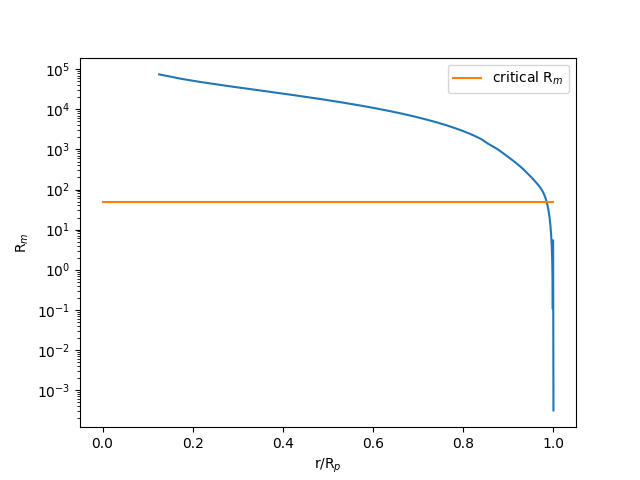

In [26]:
c = 3*10**10
eta = c**2/(4*np.pi*10**7*T**(3/2))
Rm = mdl.vconv*mdl.lmix/eta

plt.figure()
plt.plot(r, Rm)
plt.plot(r, 50*np.ones(len(Rm)), label=r'critical R$_m$')
plt.xlabel(r'r/R$_p$')
plt.ylabel(r'R$_m$')
plt.yscale('log')
plt.legend()
plt.show()

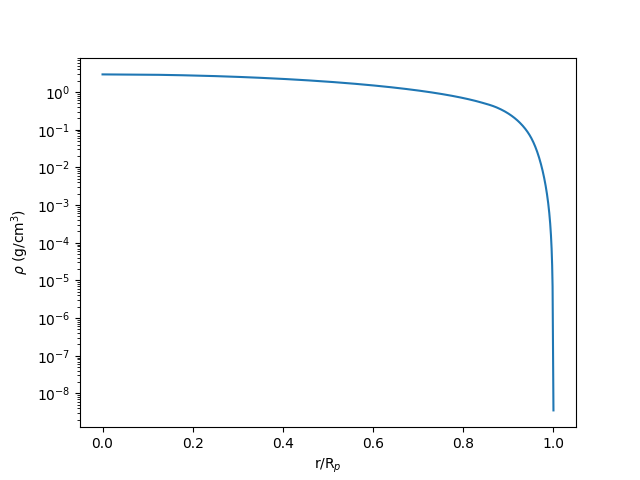

In [27]:
rho = mdl.var[end][4]

plt.figure()
plt.plot(r, rho)
plt.xlabel(r'r/R$_p$')
plt.ylabel(r'$\rho$ (g/cm$^3$)')
plt.yscale('log')
plt.show()

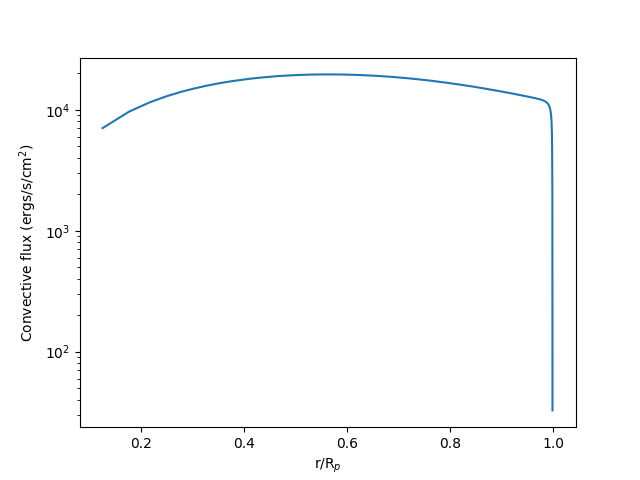

In [28]:
plt.figure()
plt.plot(r, mdl.Fconv)
plt.xlabel(r'r/R$_p$')
plt.ylabel(r'Convective flux (ergs/s/cm$^2$)')
plt.yscale('log')
plt.show()

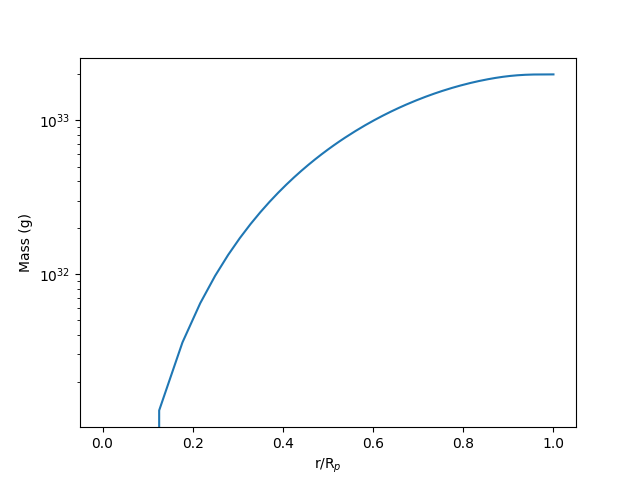

In [29]:
plt.figure()
plt.plot(r, mdl.var[end][1]*M_sun.value*1e3)
plt.xlabel(r'r/R$_p$')
plt.ylabel(r'Mass (g)')
plt.yscale('log')
plt.show()

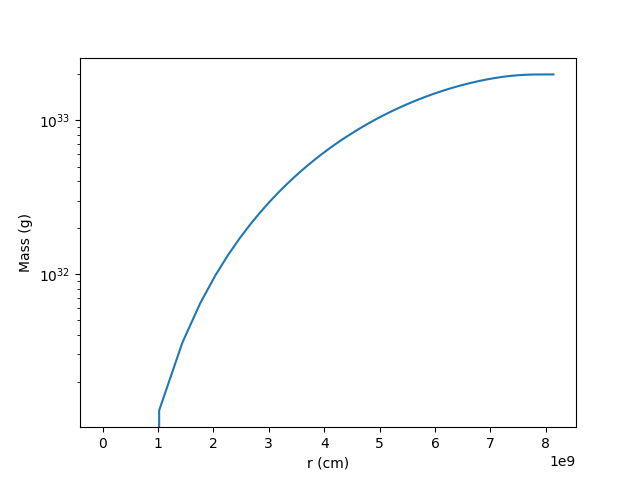

In [30]:
plt.figure()
plt.plot(mdl.var[end][0], mdl.var[end][1]*M_sun.value*1e3)
plt.xlabel(r'r (cm)')
plt.ylabel(r'Mass (g)')
plt.yscale('log')
plt.show()

In [31]:
c = 0.68
f_ohm = 1
rho_avg = np.mean(rho[mask])
#qc_avg = np.mean(mdl.Fconv[mask])
qc_0 = mdl.Fconv[mask][-1]
P = mdl.var[end][3][mask]
dr = mdl.var[end][0][mask]
m = mdl.var[end][1][mask]*M_sun.value*1e3
g = (6.67e-8)*m/dr**2
grad_ad = mdl.var[end][10][mask]
H_T = P/(rho[mask]*g*grad_ad)
mask_2 = np.where(mdl.Fconv[mask] > 0)
#print(mask_2)
dF = (mdl.Fconv[mask][mask_2]*mdl.lmix[mask][mask_2]/(qc_0*H_T[mask_2]))**(2/3)*(rho[mask][mask_2]/rho_avg)**(1/3)*4*np.pi*dr[mask_2]**2
mask_3 = np.where(dF > 0)
F = np.trapezoid(dF[mask_3][::-1], dr[mask_2][mask_3][::-1])
print(F)


3.001266410477156e+32


In [32]:
print(np.sqrt(c*rho_avg**(1/3)*qc_0**(2/3)))

12.741700322724322
